## Preparing data for analysis 

In [6]:
from fleetmanagement.dataset import get_datasets

fleetmanagement - 23:38:26 - Reading and processing datasets
fleetmanagement - 23:38:26 - Number of initial features: 79


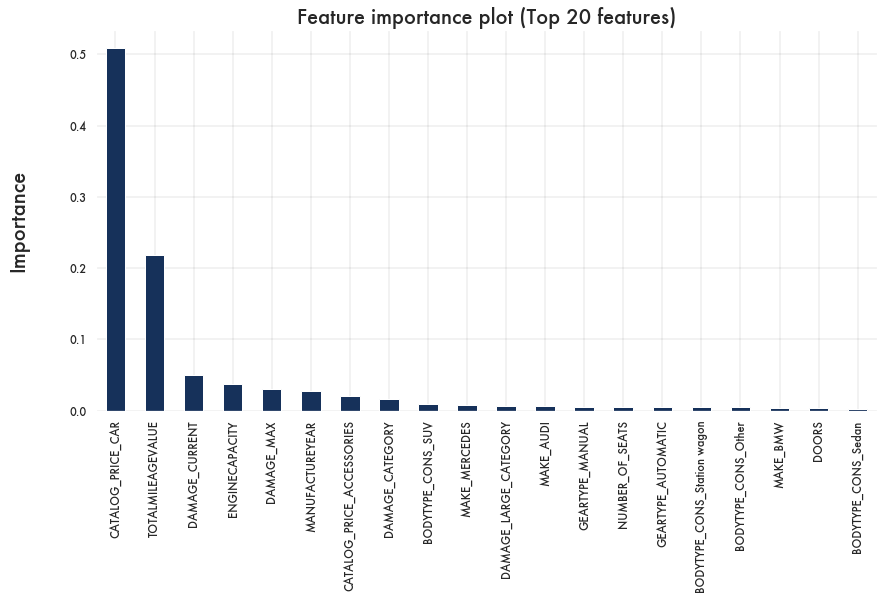

fleetmanagement - 23:38:31 - Number of features selected: 8
fleetmanagement - 23:38:31 - Selected feautres: ['CATALOG_PRICE_CAR', 'TOTALMILEAGEVALUE', 'DAMAGE_CURRENT', 'ENGINECAPACITY', 'DAMAGE_MAX', 'MANUFACTUREYEAR', 'CATALOG_PRICE_ACCESSORIES', 'DAMAGE_CATEGORY']


In [7]:
df_train, df_target, df_merged = get_datasets()

## Predicting vehicles sell price 

In [3]:
from fleetmanagement.catboost_model import PredictSellPrice

In [4]:
model = PredictSellPrice()

In [5]:
model.tune_fit(df_train)

fleetmanagement - 23:32:13 - Starting hyperparameter tunning


0:	loss: 3633.2962155	best: 3633.2962155 (0)	total: 2.04s	remaining: 59.2s
1:	loss: 3545.5088557	best: 3545.5088557 (1)	total: 3.86s	remaining: 54s
2:	loss: 3674.3991977	best: 3545.5088557 (1)	total: 5.62s	remaining: 50.6s
3:	loss: 3691.1167418	best: 3545.5088557 (1)	total: 7.64s	remaining: 49.6s
4:	loss: 3702.9741127	best: 3545.5088557 (1)	total: 9.58s	remaining: 47.9s
5:	loss: 3694.6937702	best: 3545.5088557 (1)	total: 11.5s	remaining: 45.9s
6:	loss: 3747.5678213	best: 3545.5088557 (1)	total: 13.4s	remaining: 44s
7:	loss: 3747.8599438	best: 3545.5088557 (1)	total: 15.4s	remaining: 42.2s
8:	loss: 3769.2438097	best: 3545.5088557 (1)	total: 17.2s	remaining: 40.1s
9:	loss: 3733.1756734	best: 3545.5088557 (1)	total: 19s	remaining: 38s
10:	loss: 3707.4058684	best: 3545.5088557 (1)	total: 22s	remaining: 37.9s
11:	loss: 3671.4255241	best: 3545.5088557 (1)	total: 26.4s	remaining: 39.6s
12:	loss: 3778.3308245	best: 3545.5088557 (1)	total: 32s	remaining: 41.9s
13:	loss: 3720.1932738	best: 3545.

fleetmanagement - 23:38:36 - Best parameters: {'depth': 4, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
fleetmanagement - 23:38:36 - Fitting model on training dataset


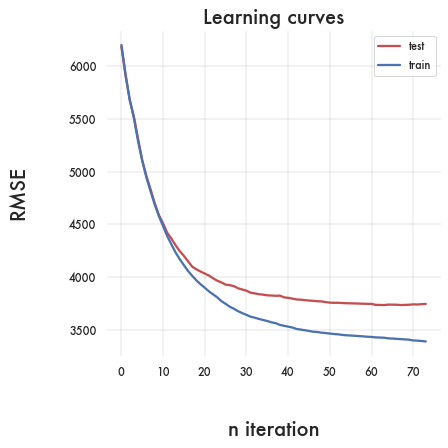

In [6]:
model.plot_model_fit()

In [7]:
df_predicted = model.predict(df_target)

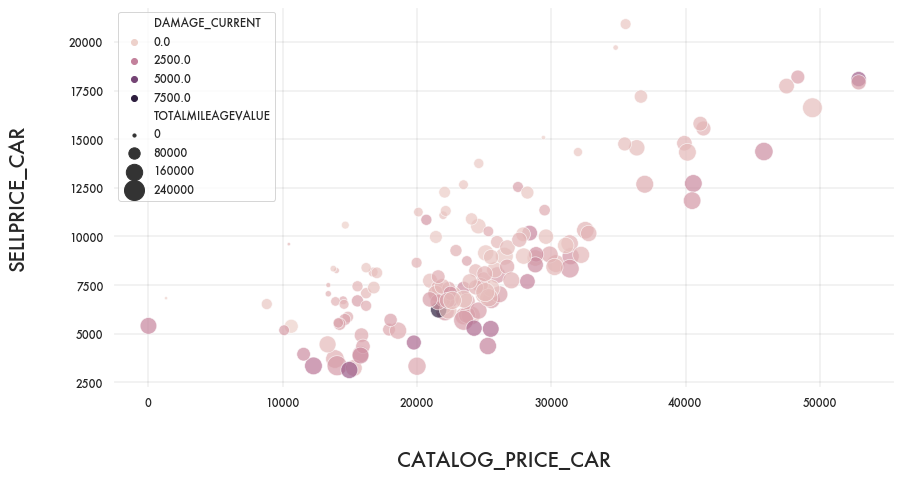

In [8]:
model.plot_predictions()

## Selection of vehicles 

In [9]:
from fleetmanagement.selection import select_cars, add_sell_price

In [10]:
selected_vehicles = select_cars(df_merged, N=50)

fleetmanagement - 23:38:37 - Selecting optimal 50 cars to sell BSC


In [11]:
selected_vehicles = add_sell_price(selected_vehicles, df_predicted)

## Save results

In [18]:
selected_vehicles.to_csv("../results/selected_vehicles.csv")